<a href="https://colab.research.google.com/github/dpachon30/Metodos1_DavidPachon_JuanSanchez/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

In [46]:
states = np.array([0,1])
prior = np.array([0.2,0.8])


T = np.array([[0.8,0.2],[0.2,0.8]])
E = np.array([[0.5,0.9],[0.5,0.1,]])

DictO = {"S":0,"C":1} 

obs = np.array([0,1,1,1,0,1,0,1])

def GetHiddenStates(States, N):
    
    CStates = list( combinations_with_replacement(States,N) )
    
    Permu = []
    
    for it in CStates:
        p = list(permutations(it,N))
        
        for i in p:
            if i not in Permu:
                Permu.append(i)
    
    #print(CStates)
    return np.array(Permu)

HiddenStates = GetHiddenStates(states,8)  
print(len(HiddenStates))  
print(HiddenStates[32])
#T[2,1]

256
[1 0 0 0 0 1 0 0]


[[1 1 1 1 0 0 0 0]] 0.0001911029760000001


256

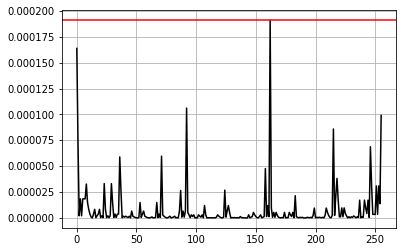

In [51]:
def GetProb(T,E,Obs,State,Prior):
    n= len(Obs)
    p=1
    p*= Prior[State[0]]

    for i in range(n-1):
        p *= T[ State[i+1],State[i]]
    #print(p,State)
    
    for i in range(n):
        p *= E[ Obs[i], State[i] ]
    
    return p

dim= len(HiddenStates)
P= np.zeros(dim)



for i in range(dim):
    P[i]= GetProb(T,E,Obs,HiddenStates[i],prior)

maxP = np.max(P)
ii = np.where( P == np.amax(P))
print(HiddenStates[ii],maxP)

plt.plot(P,color='k')
#plt.axhline(y=maxP)
plt.grid()
plt.axhline(y=maxP,color="r")


In [48]:
ObsStates = GetHiddenStates([0,1],8)


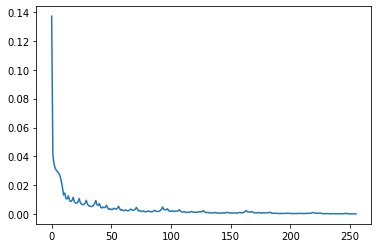

In [49]:
NObs = ObsStates.shape[0]

PObs = np.zeros(NObs)

for j in range(NObs):
    
    dim = HiddenStates.shape[0]
    P = np.zeros(dim)
    
    for i in range(dim):
        P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],prior)
        
    PObs[j] = np.sum(P)
plt.plot(PObs)

In [50]:
maxP = np.max(PObs)
ii = np.where( PObs == np.amax(PObs))
print(ObsStates[ii],maxP)

np.sum(PObs)

[[0 0 0 0 0 0 0 0]] 0.13698241367042568


1.0000000000000007